# WALK AND RUN PROJECT

## IMPORTING NECESSARY PACKAGES

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

## LOADING DATA

In [2]:
data = pd.read_csv('walkrun.csv')
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


## EDA CHECK

In [22]:
print('skew=',stats.skew(data.activity))
print('kurtosis=',stats.kurtosis(data.activity))

skew= -0.003205855926891329
kurtosis= -1.999989722487776


In [23]:
data.shape

(88588, 11)

In [24]:
Counter(data.activity)

Counter({0: 44223, 1: 44365})

## visualisation of target

1.checking target of the data is balanced or not

2.0 represents walk and 1 represents run



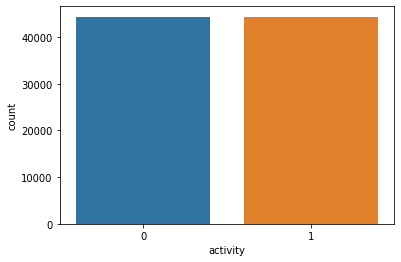

In [25]:
sb.countplot(data.activity)

## Defining X and y

In [26]:
X = data.loc[:,['wrist','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']]
y= data.activity
print(X.head())
print(y.head())

   wrist  acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  \
0      0          0.2650         -0.7814         -0.0076 -0.0590  0.0325   
1      0          0.6722         -1.1233         -0.2344 -0.1757  0.0208   
2      0          0.4399         -1.4817          0.0722 -0.9105  0.1063   
3      0          0.3031         -0.8125          0.0888  0.1199 -0.4099   
4      0          0.4814         -0.9312          0.0359  0.0527  0.4379   

   gyro_z  
0 -2.9296  
1  0.1269  
2 -2.4367  
3 -2.9336  
4  2.4922  
0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64


## Splitting the data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [28]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (62011, 7)
X_test shape (26577, 7)
y_train shape (62011,)
y_test shape (26577,)


## Defining the model, trainning the model and predicting X_test

In [29]:
model_lr = LogisticRegression( random_state=50)
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)


## Accuracy test

In [30]:
accuracy_score(y_test,y_predict)

0.8616849155284645

As this model is giving 86% of accuracy so we decided to go with this model 

## crosstab

In [31]:
pd.crosstab(y_test,y_predict)

col_0,0,1
activity,,
0,12115,1198
1,2478,10786


-> a.While considering 0's 91% are correctly predicted and 9% are mispredicted as 1


-> b.While considering 1's 81.3% are correctly predicted and 18.7% are mispredicted as 0

## precision, recall and classification report

In [32]:
precision_score(y_test,y_predict)

0.9000333778371161

In [33]:
recall_score(y_test,y_predict)

0.8131785283474066

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13313
           1       0.90      0.81      0.85     13264

    accuracy                           0.86     26577
   macro avg       0.87      0.86      0.86     26577
weighted avg       0.87      0.86      0.86     26577



## CV score

In [35]:
cv_score = cross_val_score(LogisticRegression(),X,y,cv=10)
print(cv_score)

[0.87346202 0.87696128 0.84083982 0.8426459  0.86623772 0.91421154
 0.85032171 0.77514392 0.827049   0.86407767]


In [36]:
print('maximum cv =', max(cv_score))
print('minimum cv =', min(cv_score))
print('average cv =',np.mean(cv_score))

maximum cv = 0.9142115362907778
minimum cv = 0.775143921435828
average cv = 0.8530950573051717


Since the model accuracy and score are closest value, the model is not over fitted.